In [1]:
import tensorflow as tf
import numpy as np
import os
import librosa


c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import os
import librosa

audio_files_dir = r'archive\16000_pcm_speeches'
audio_data = []
sr_audios = []
for root, dirs, files in os.walk(audio_files_dir):
  for file in files:
    if file.endswith(".wav"):
      file_path = os.path.join(root, file)
      data, sr = librosa.load(file_path, sr=None)
      sr_audios.append(sr)
      audio_data.append(data)


In [3]:
print(audio_data[1])

[ 0.00396729 -0.00119019 -0.00973511 ...  0.20730591  0.18551636
  0.1104126 ]


[7501, 1, 1, 1, 1, 1, 1]


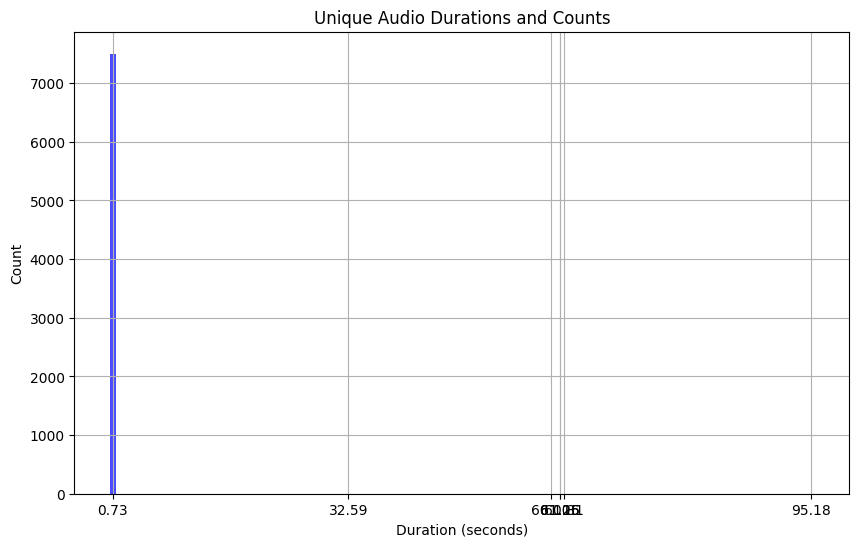

[ 0.72562358 32.58566893 60.         61.1555102  61.25387755 61.80571429
 95.18312925]


In [4]:
import matplotlib.pyplot as plt
from collections import Counter

# Calculate the duration of each audio clip in seconds
audio_durations = [len(data) / sr for data in audio_data]

duration_counts = Counter(audio_durations)

unique_durations = list(duration_counts.keys())
counts = list(duration_counts.values())

print(counts)
# Create a bar chart to visualize unique audio durations and their counts
plt.figure(figsize=(10, 6))
plt.bar(unique_durations, counts, color='blue', alpha=0.7)
plt.title('Unique Audio Durations and Counts')
plt.xticks(np.unique(audio_durations))
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.grid(True)
plt.show()
print((np.unique(audio_durations)))

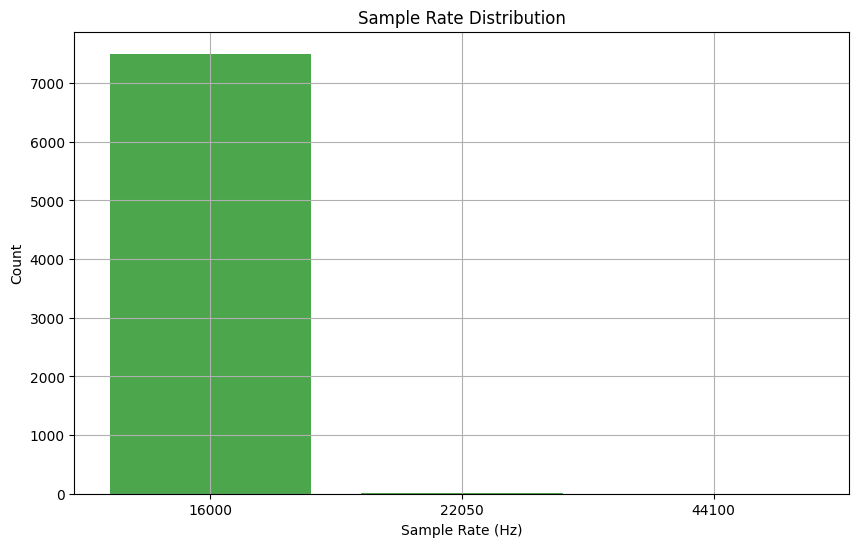

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract sample rates from the audio data
sample_rates = sr_audios

# Count the occurrences of each sample rate
sample_rate_counts = Counter(sample_rates)

# Extract unique sample rates and their counts
unique_sample_rates = list(sample_rate_counts.keys())

counts = list(sample_rate_counts.values())
plt.figure(figsize=(10, 6))
plt.bar(range(len(unique_sample_rates)), counts, color='green', alpha=0.7)
plt.title('Sample Rate Distribution')
plt.xlabel('Sample Rate (Hz)')
plt.ylabel('Count')
plt.xticks(range(len(unique_sample_rates)), unique_sample_rates)  # Set custom X-axis labels
plt.grid(True)
plt.show()



In [6]:
print(unique_sample_rates)
print(counts)

[16000, 22050, 44100]
[7501, 5, 1]


In [7]:
invalid_sample_rate_paths = []


In [8]:
# Compare the unique_sample_rates list with the expected sample rate (16000 Hz)
for i, rate in enumerate(unique_sample_rates):
    if rate != 16000:
        invalid_sample_rate_paths.extend([file for file, s in zip(files, sr_audios) if s == rate])

# Display the audio paths where the sample rate is not 16000
if len(invalid_sample_rate_paths) > 0:
    print("Audio paths where the sample rate is not 16000:")
    for path in invalid_sample_rate_paths:
        print(os.path.join(audio_files_dir, path))
else:
    print("No audio paths found with a sample rate other than 16000.")


No audio paths found with a sample rate other than 16000.


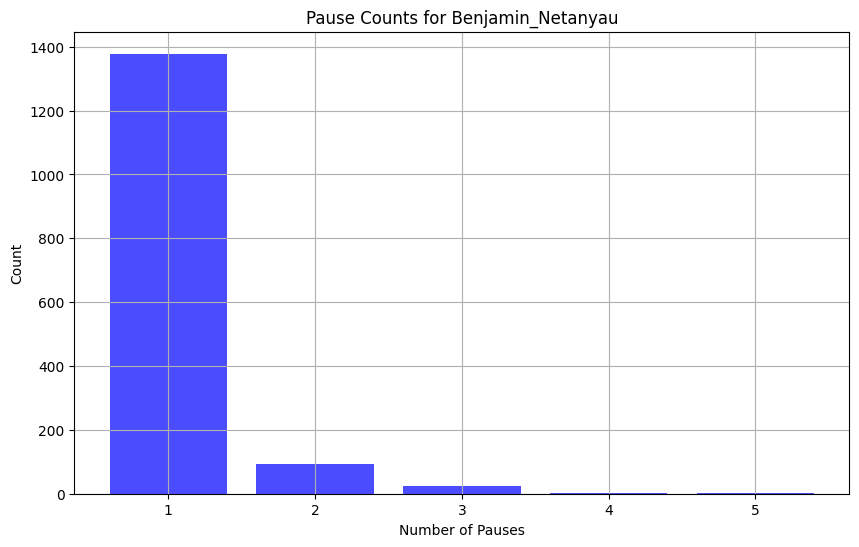

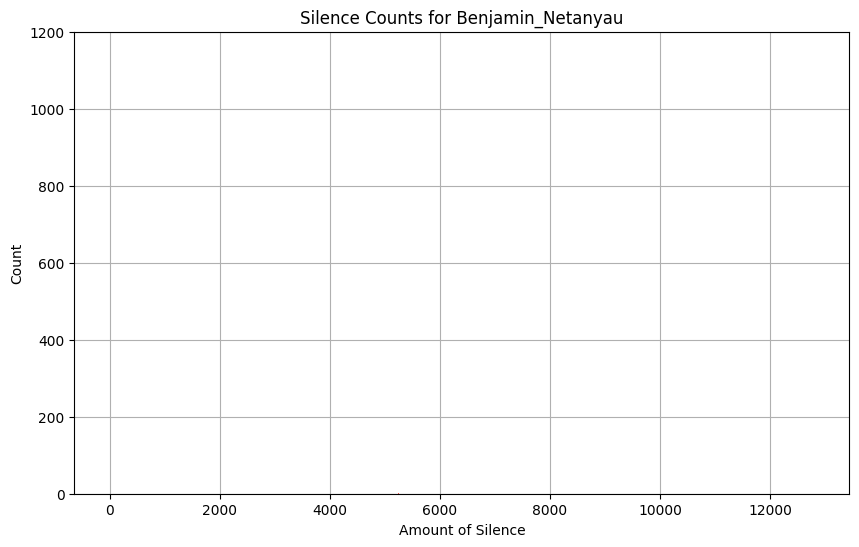

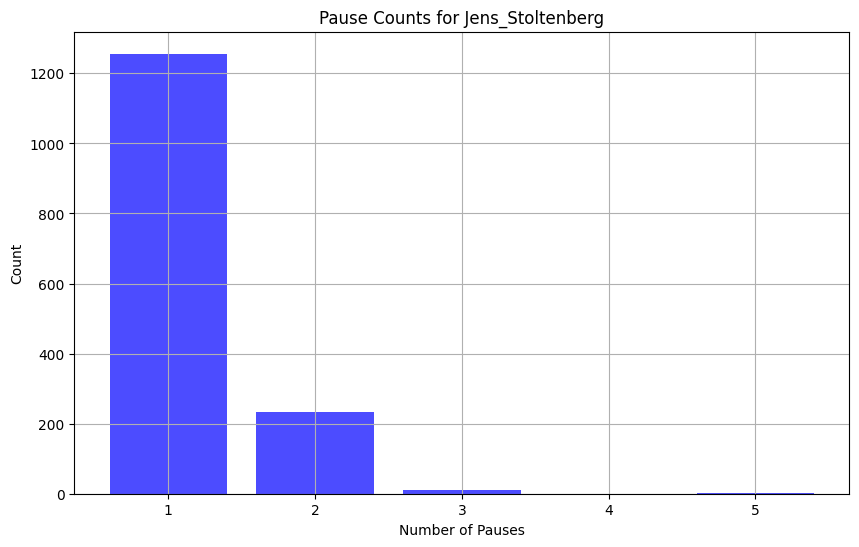

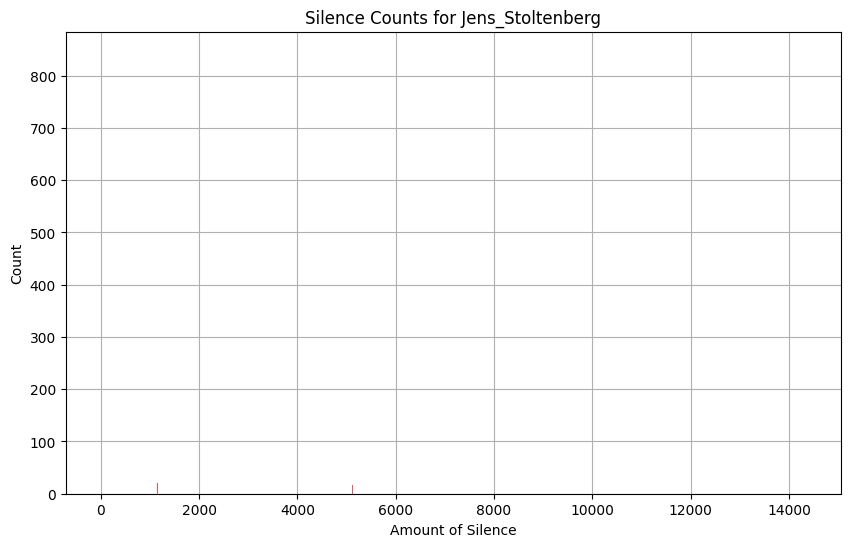

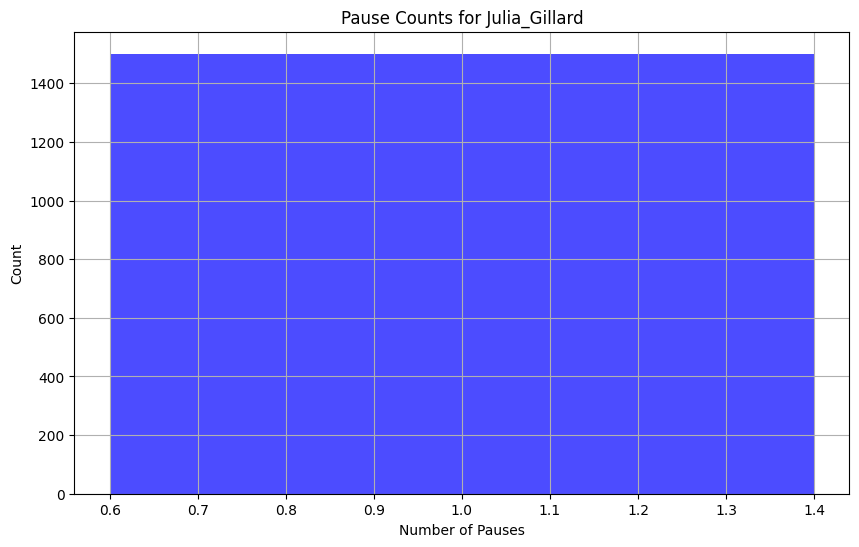

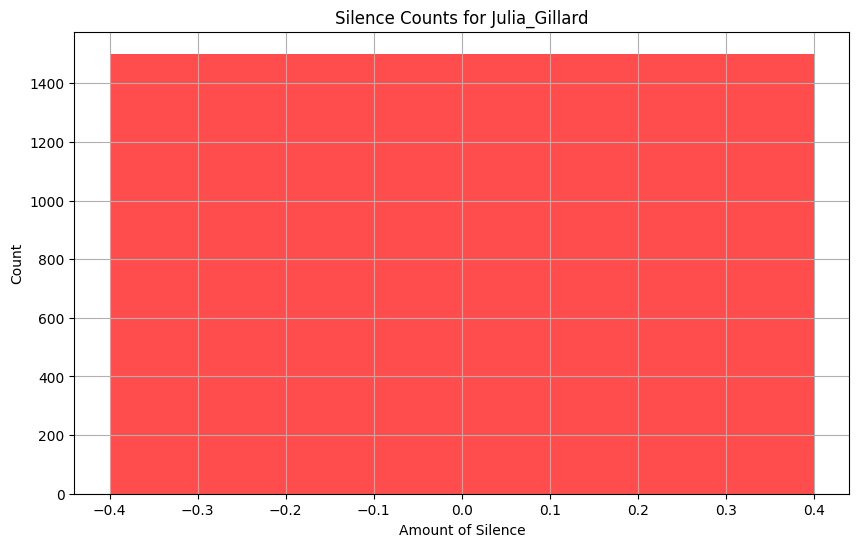

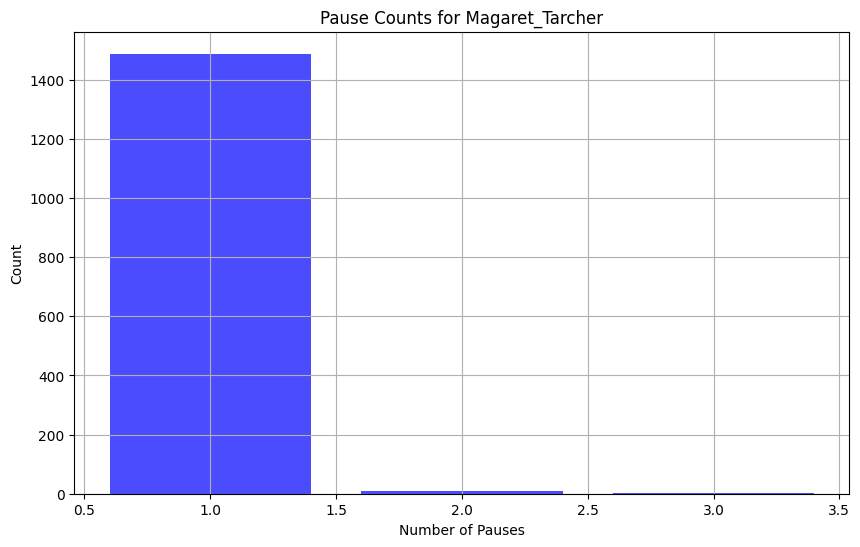

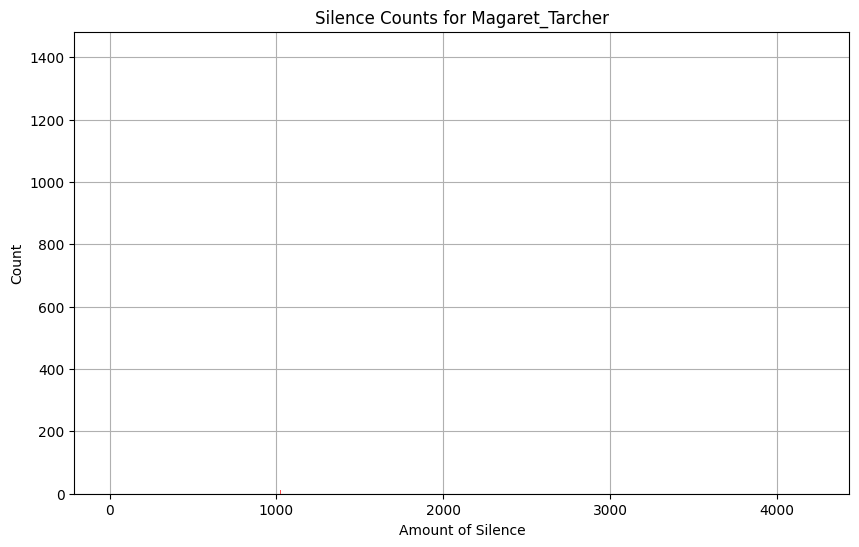

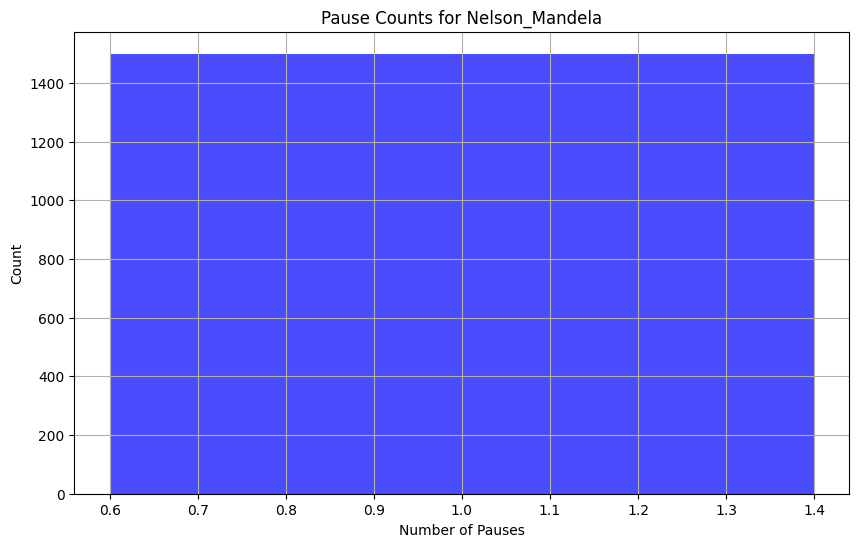

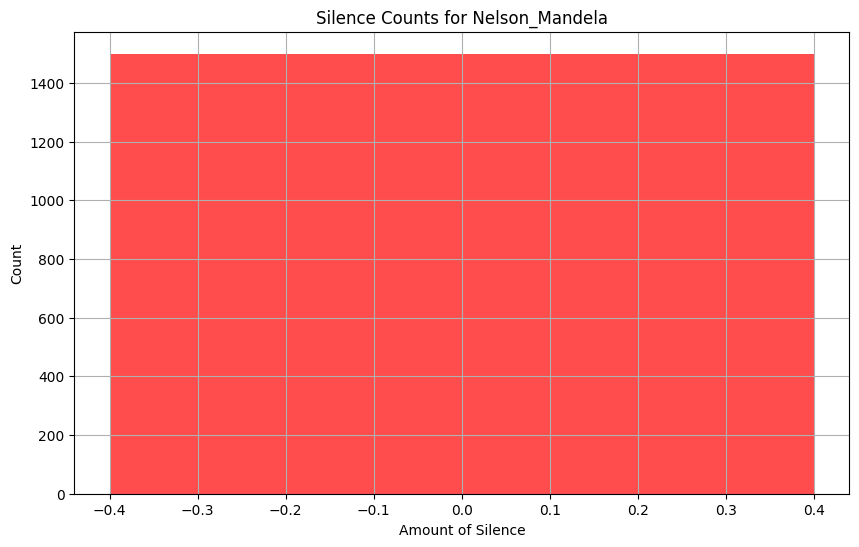

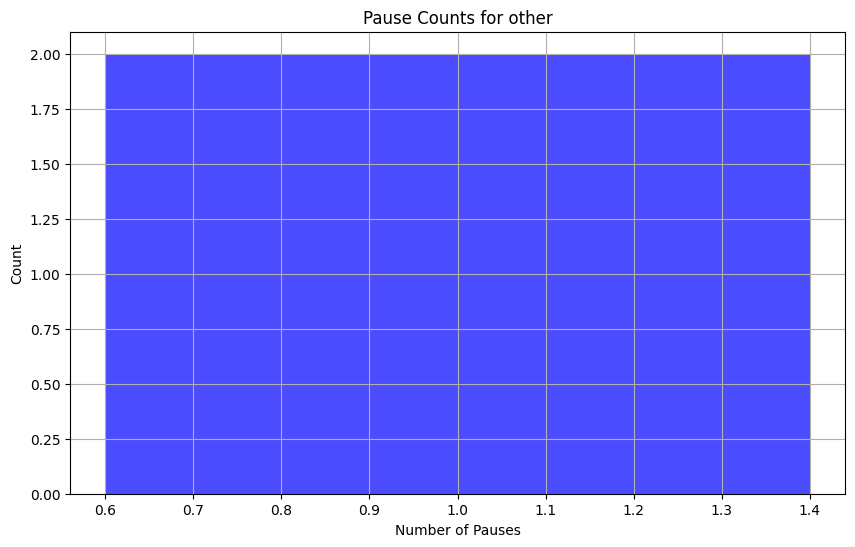

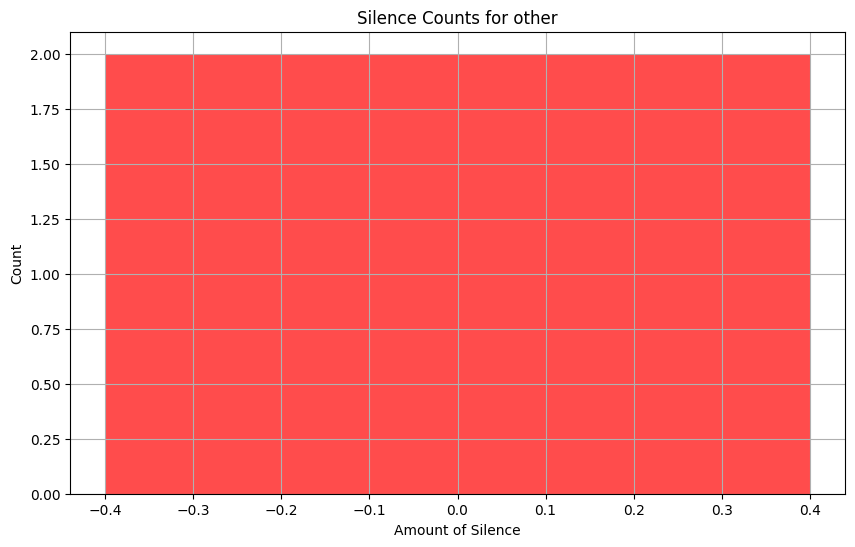

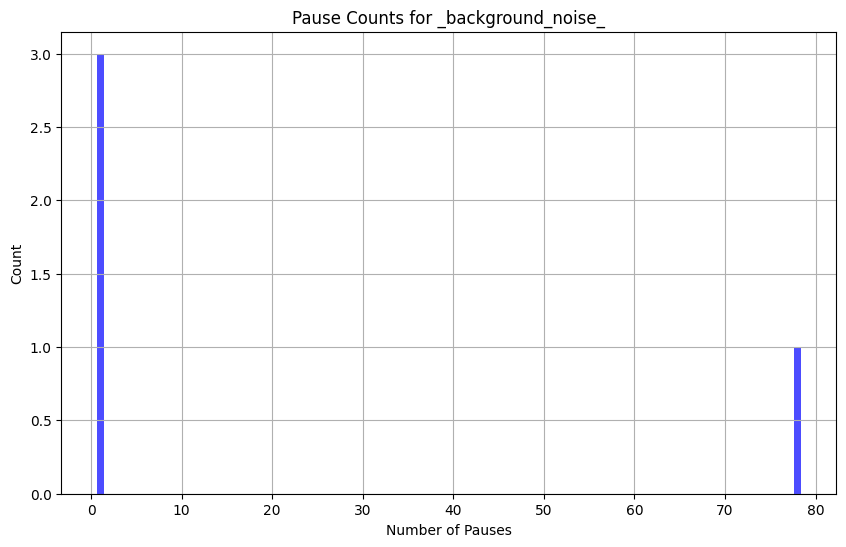

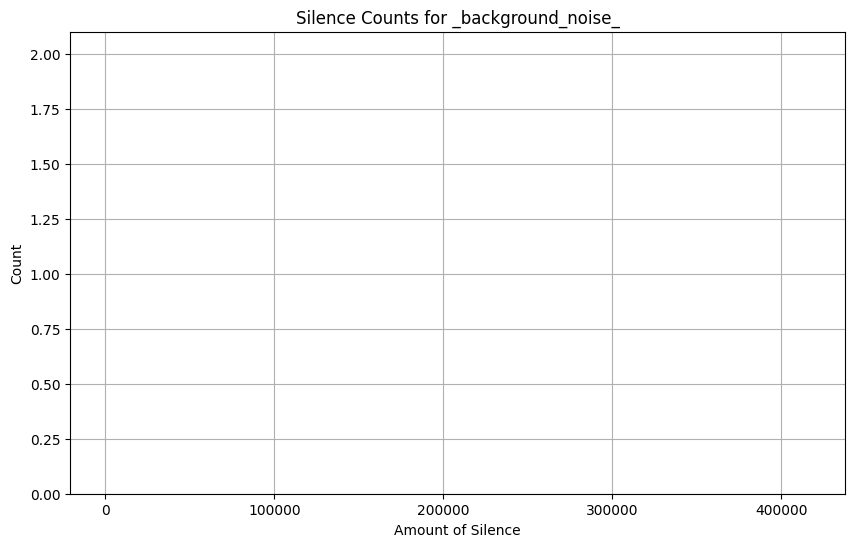

In [9]:
import os
import librosa
from collections import Counter

audio_files_dir = r'archive\16000_pcm_speeches'

folders = os.listdir(audio_files_dir)

for folder in folders:
    folder_path = os.path.join(audio_files_dir, folder)
    if os.path.isdir(folder_path):
        pause_counts = Counter()
        silence_counts = Counter()
        other_characteristics_counts = Counter()  # You can add other characteristics as needed

        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if file.endswith(".wav"):
                    file_path = os.path.join(root, file)
                    data, sr = librosa.load(file_path, sr=None)

                    # Calculate pauses and silence
                    intervals = librosa.effects.split(data, top_db=30)
                    pause_counts[len(intervals)] += 1
                    silence_counts[len(data) - sum([y - x for x, y in intervals])] += 1

                    # You can add other characteristic calculations here

        # Plotting pause counts
        plt.figure(figsize=(10, 6))
        plt.bar(pause_counts.keys(), pause_counts.values(), color='blue', alpha=0.7)
        plt.title(f'Pause Counts for {folder}')
        plt.xlabel('Number of Pauses')
        plt.ylabel('Count')
        plt.grid(True)
        plt.show()

        # Plotting silence counts
        plt.figure(figsize=(10, 6))
        plt.bar(silence_counts.keys(), silence_counts.values(), color='red', alpha=0.7)
        plt.title(f'Silence Counts for {folder}')
        plt.xlabel('Amount of Silence')
        plt.ylabel('Count')
        plt.grid(True)
        plt.show()

        # You can plot other characteristics here if needed


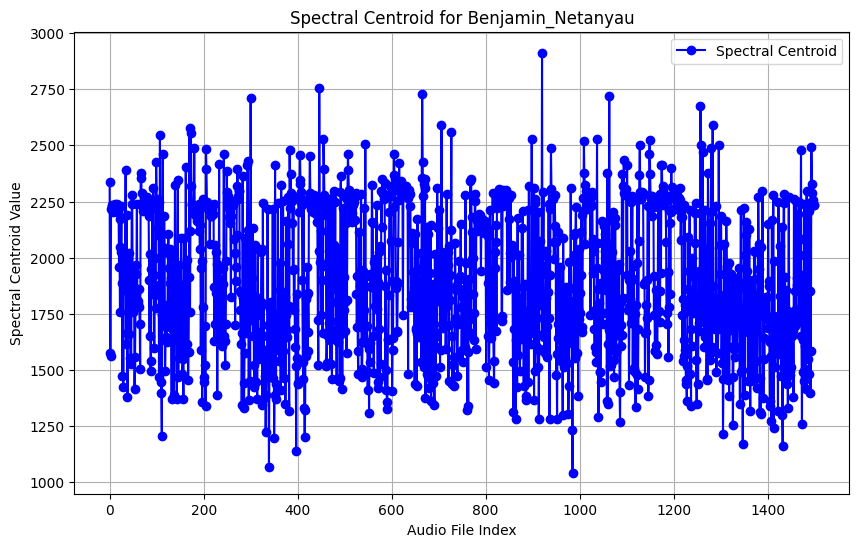

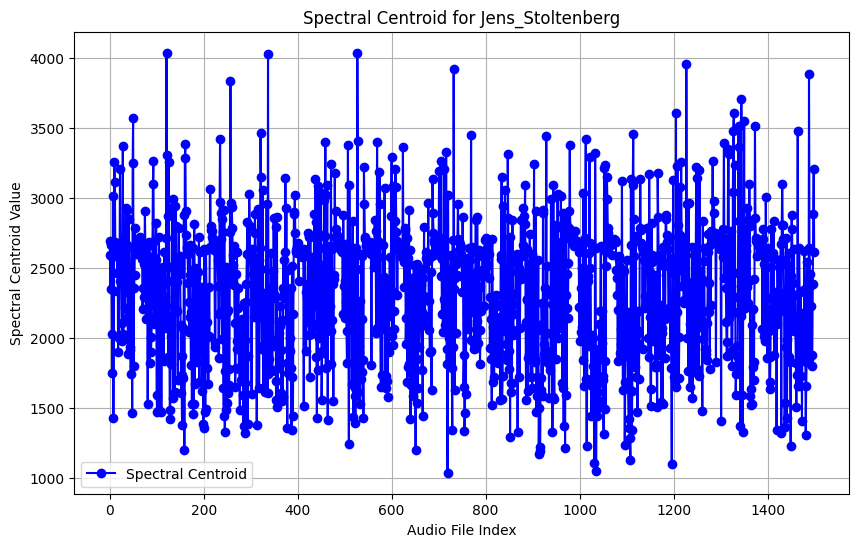

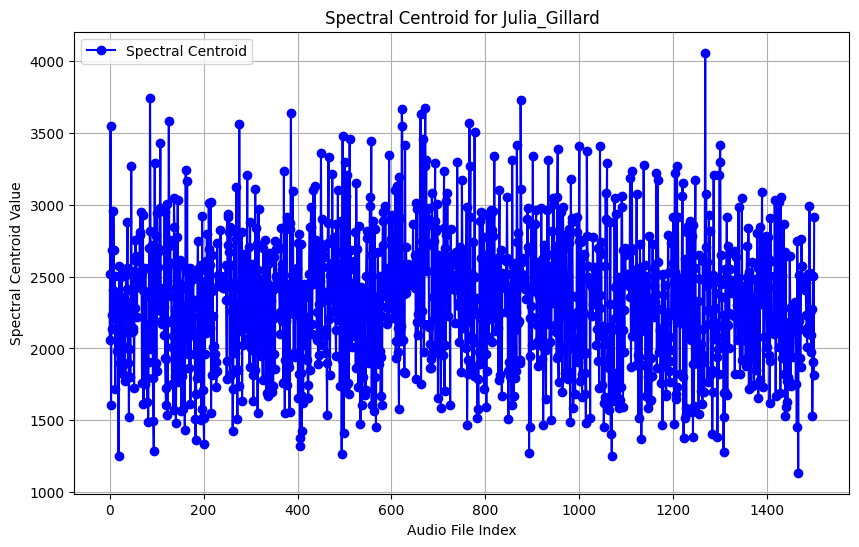

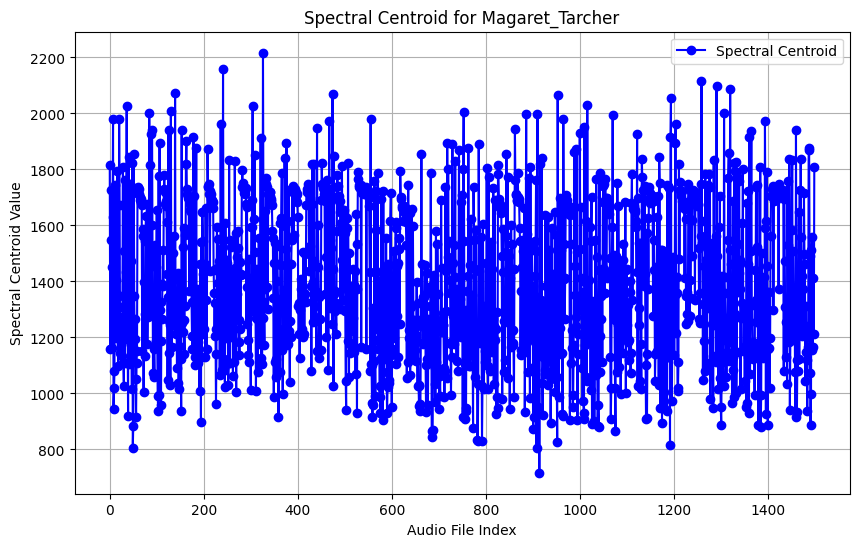

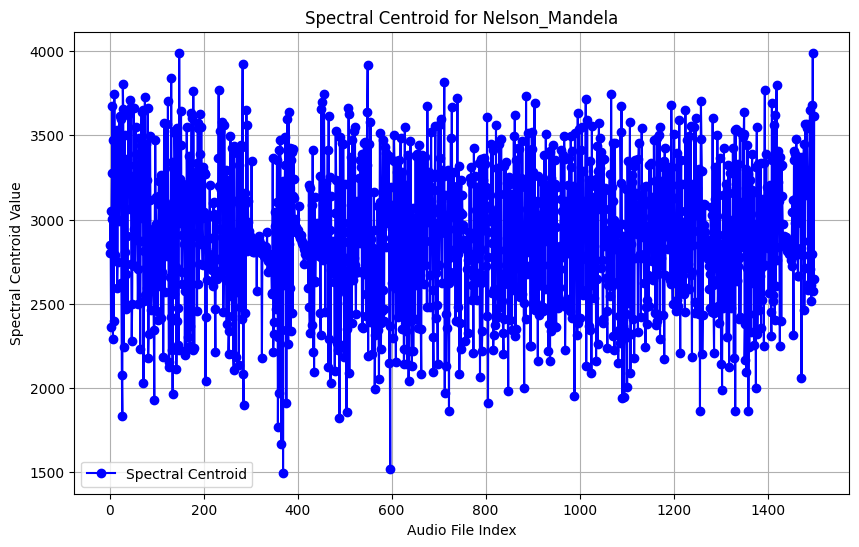

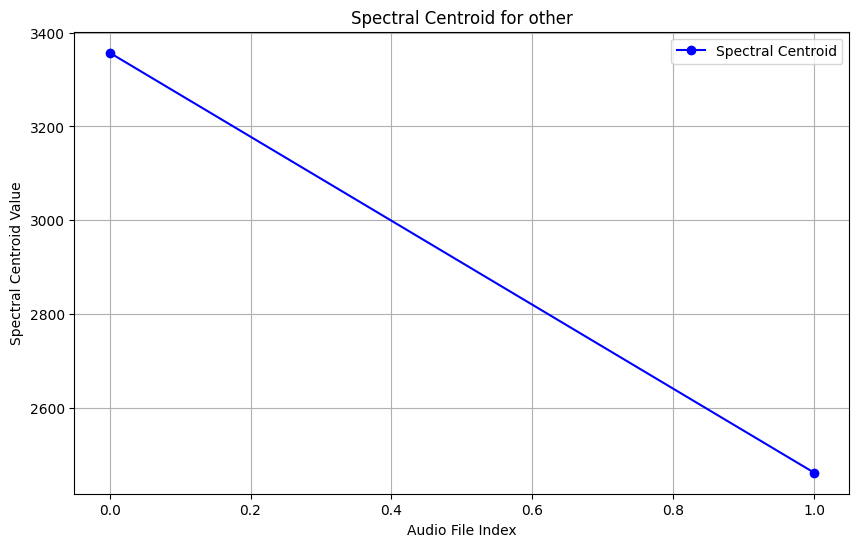

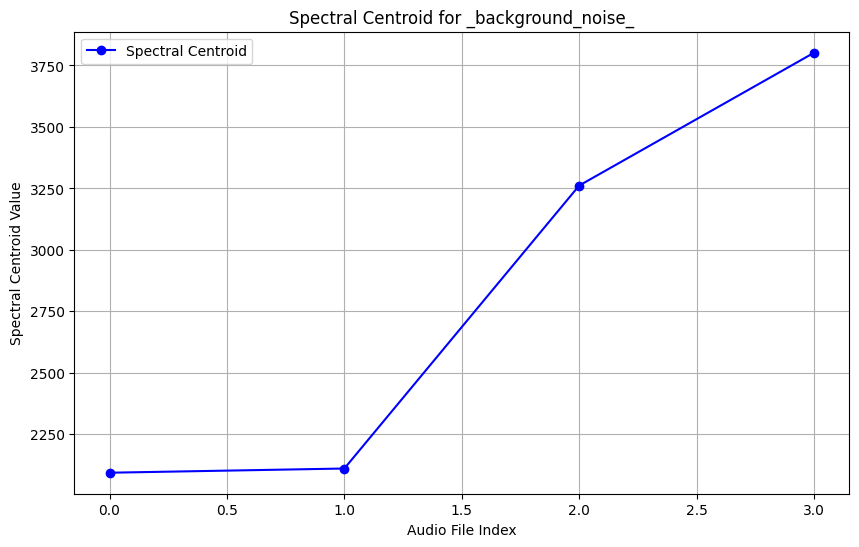

In [11]:
import os
import librosa
import matplotlib.pyplot as plt

audio_files_dir = r'archive\16000_pcm_speeches'

folders = os.listdir(audio_files_dir)

for folder in folders:
    folder_path = os.path.join(audio_files_dir, folder)
    if os.path.isdir(folder_path):
        centroid_values = []

        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if file.endswith(".wav"):
                    file_path = os.path.join(root, file)
                    data, sr = librosa.load(file_path, sr=None)

                    # Calculate the spectral centroid
                    spectral_centroids = librosa.feature.spectral_centroid(y=data, sr=sr)
                    mean_centroid = spectral_centroids.mean()
                    centroid_values.append(mean_centroid)

        # Plot the spectral centroid values
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(centroid_values)), centroid_values, marker='o', linestyle='-', color='b', label='Spectral Centroid')
        plt.title(f'Spectral Centroid for {folder}')
        plt.xlabel('Audio File Index')
        plt.ylabel('Spectral Centroid Value')
        plt.legend()
        plt.grid(True)
        plt.show()


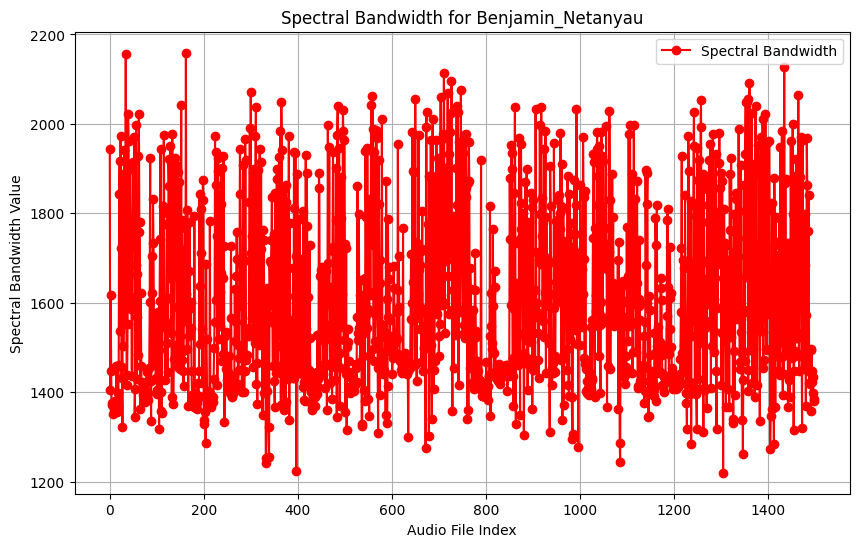

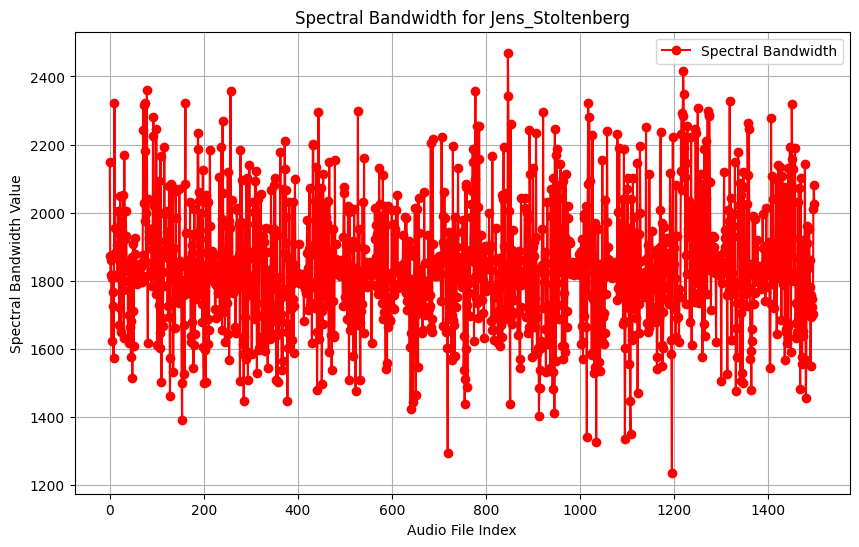

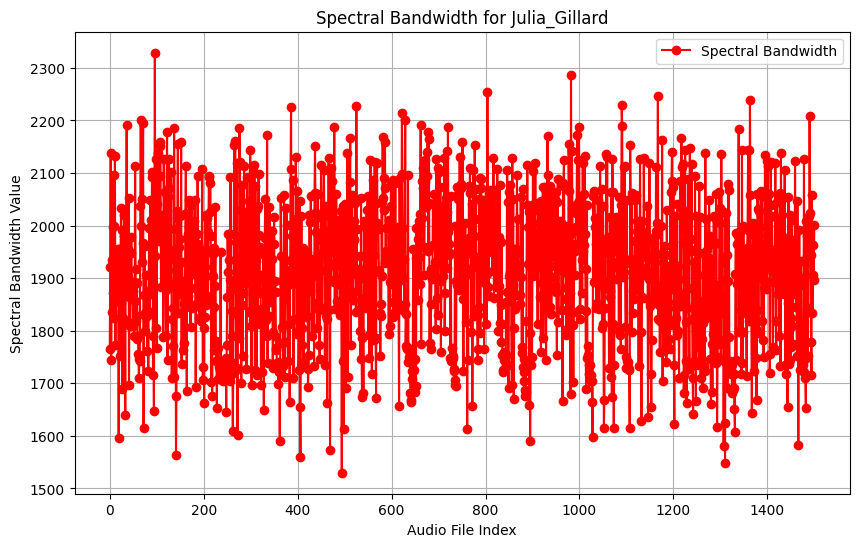

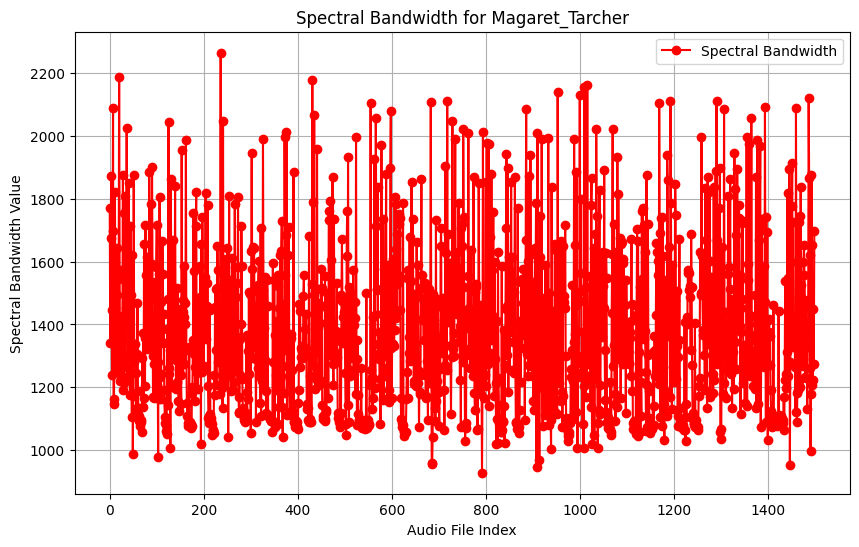

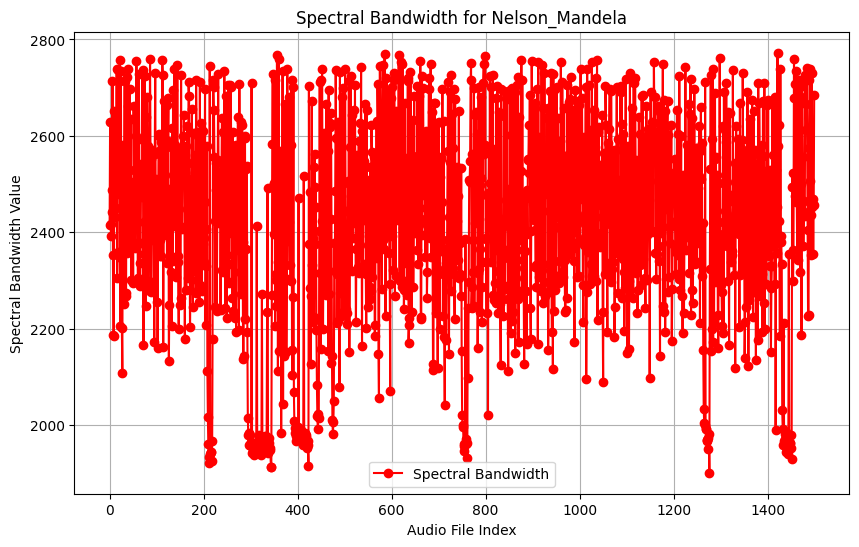

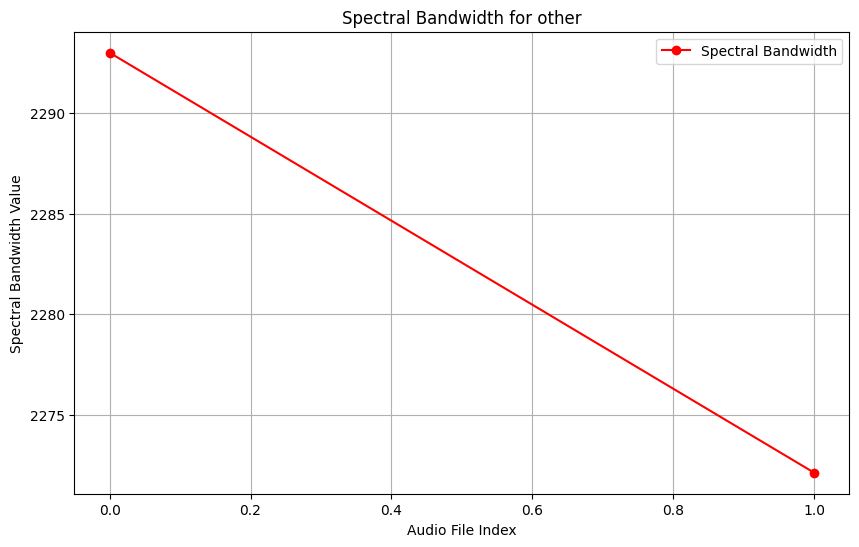

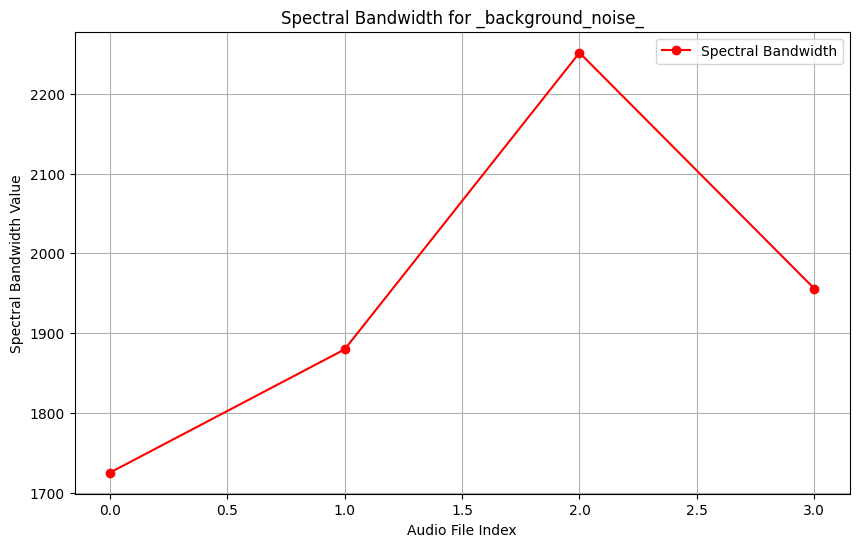

In [12]:
import os
import librosa
import matplotlib.pyplot as plt

audio_files_dir = r'archive\16000_pcm_speeches'

folders = os.listdir(audio_files_dir)

for folder in folders:
    folder_path = os.path.join(audio_files_dir, folder)
    if os.path.isdir(folder_path):
        bandwidth_values = []

        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if file.endswith(".wav"):
                    file_path = os.path.join(root, file)
                    data, sr = librosa.load(file_path, sr=None)

                    # Calculate the spectral bandwidth
                    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=data, sr=sr)
                    mean_bandwidth = spectral_bandwidth.mean()
                    bandwidth_values.append(mean_bandwidth)

        # Plot the spectral bandwidth values
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(bandwidth_values)), bandwidth_values, marker='o', linestyle='-', color='r', label='Spectral Bandwidth')
        plt.title(f'Spectral Bandwidth for {folder}')
        plt.xlabel('Audio File Index')
        plt.ylabel('Spectral Bandwidth Value')
        plt.legend()
        plt.grid(True)
        plt.show()


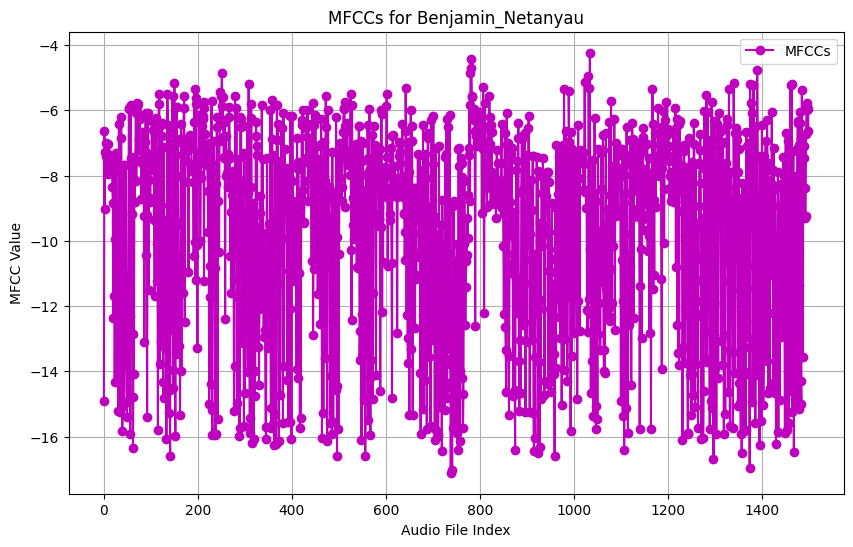

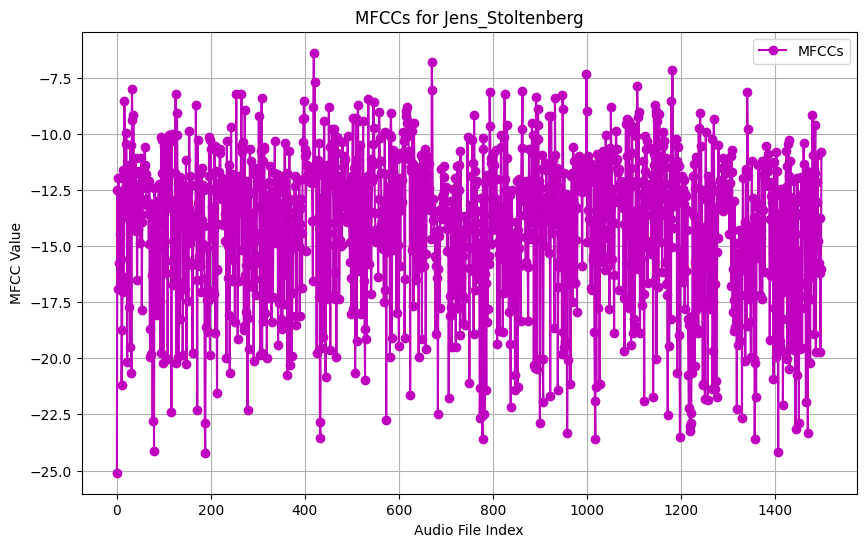

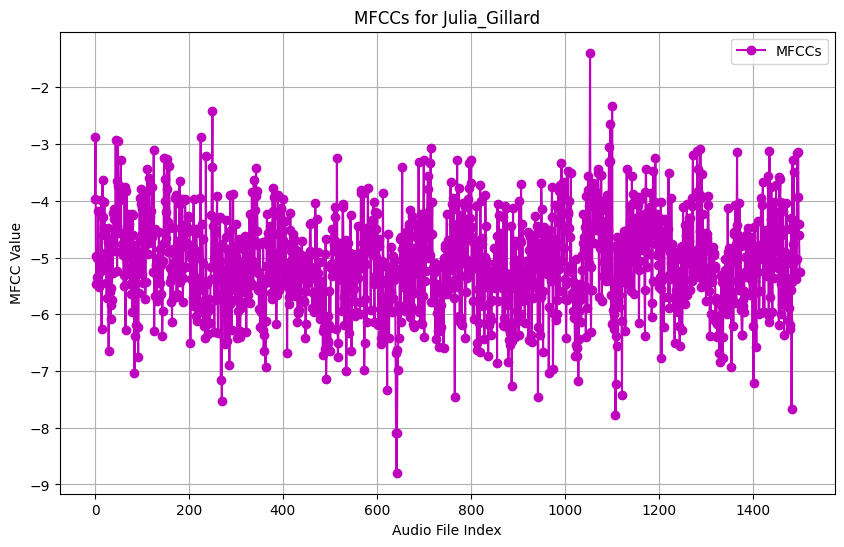

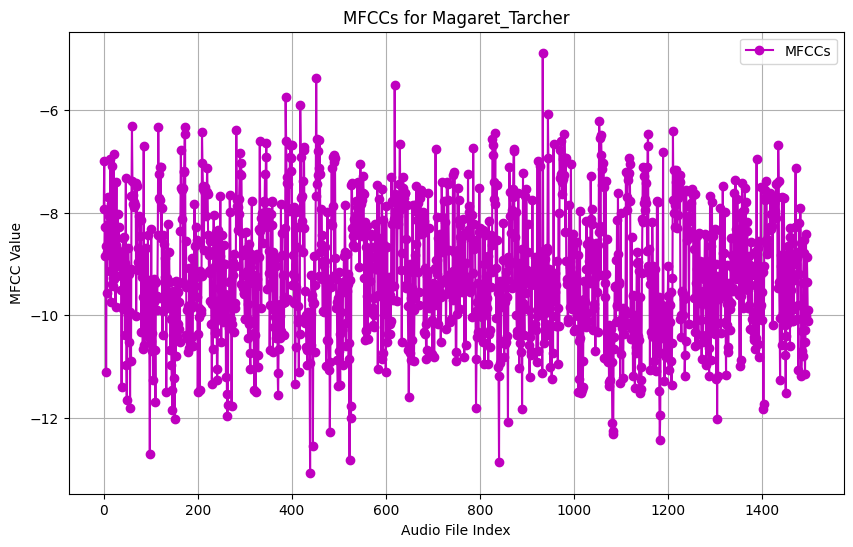

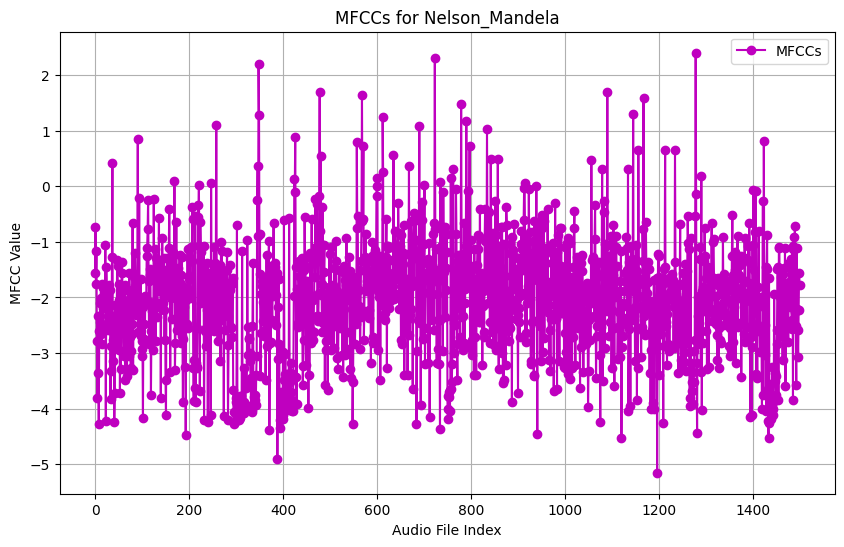

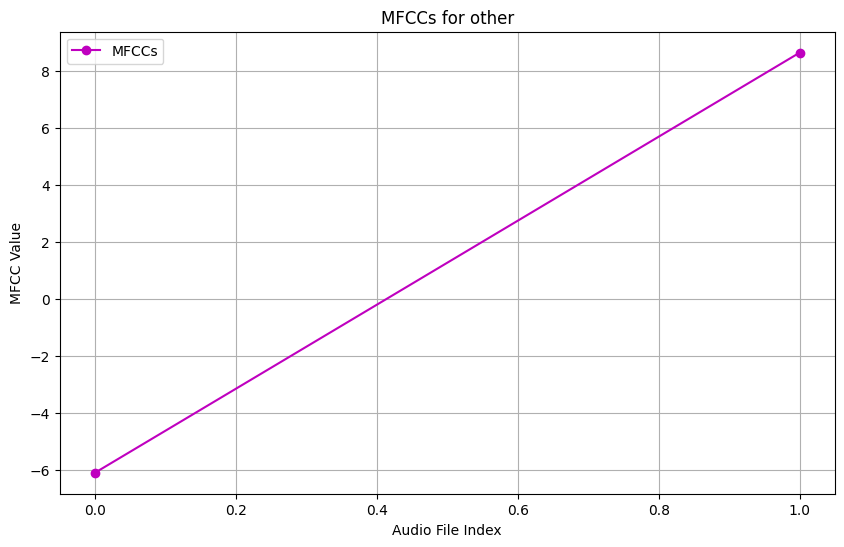

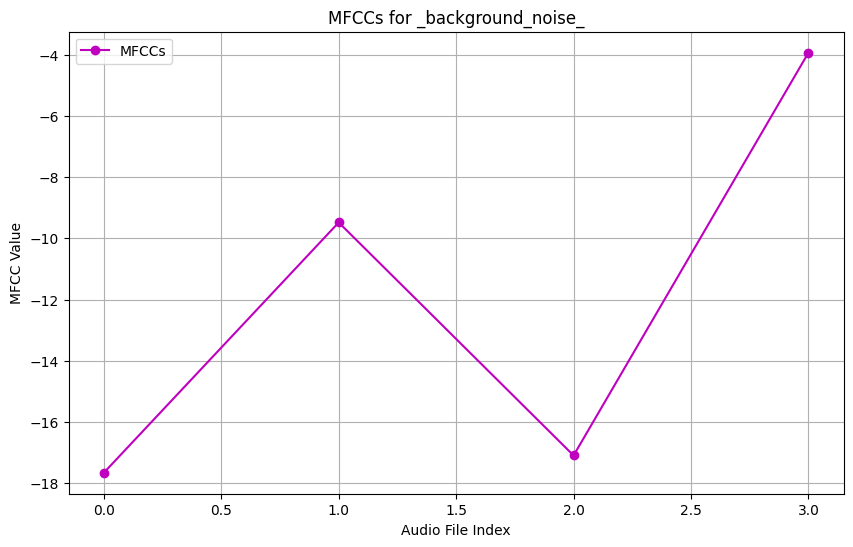

In [16]:
import os
import librosa
import matplotlib.pyplot as plt

audio_files_dir = r'archive\16000_pcm_speeches'

folders = os.listdir(audio_files_dir)

for folder in folders:
    folder_path = os.path.join(audio_files_dir, folder)
    if os.path.isdir(folder_path):
        mfcc_values = []

        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if file.endswith(".wav"):
                    file_path = os.path.join(root, file)
                    data, sr = librosa.load(file_path, sr=None)

                    # Calculate the MFCCs
                    mfcc = librosa.feature.mfcc(y=data, sr=sr)
                    mean_mfcc = mfcc.mean()
                    mfcc_values.append(mean_mfcc)

        # Plot the MFCC values
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(mfcc_values)), mfcc_values, marker='o', linestyle='-', color='m', label='MFCCs')
        plt.title(f'MFCCs for {folder}')
        plt.xlabel('Audio File Index')
        plt.ylabel('MFCC Value')
        plt.legend()
        plt.grid(True)
        plt.show()


ValueError: x and y can be no greater than 2D, but have shapes (1500,) and (1500, 12, 32)

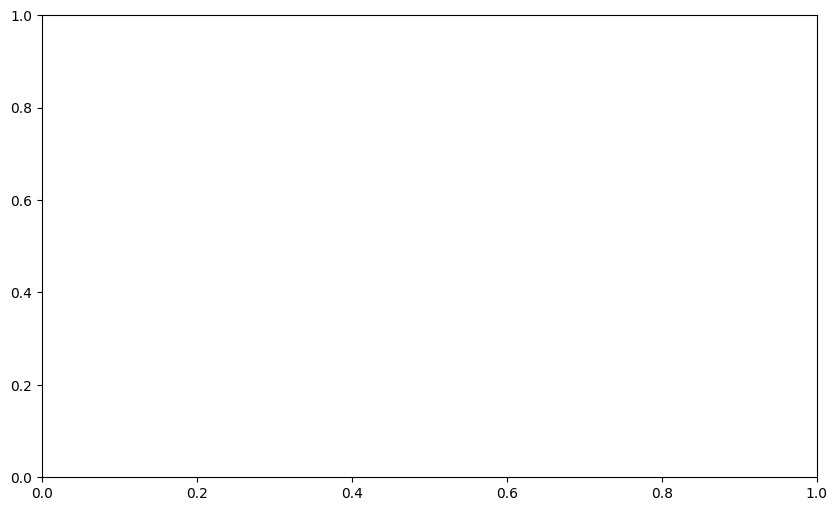

In [21]:
import os
import librosa
import matplotlib.pyplot as plt

audio_files_dir = r'archive\16000_pcm_speeches'

folders = os.listdir(audio_files_dir)

for folder in folders:
    folder_path = os.path.join(audio_files_dir, folder)
    if os.path.isdir(folder_path):
        chroma_values = []

        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if file.endswith(".wav"):
                    file_path = os.path.join(root, file)
                    data, sr = librosa.load(file_path, sr=None)
                    chroma = librosa.feature.chroma_stft(y=data, sr=sr)
                    mean_chroma = chroma.mean()
                    chroma_values.append(mean_chroma)

        # Plot the Chroma feature values
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(chroma_values)), chroma_values, marker='o', color='c', label='Chroma Features')
        plt.title(f'Chroma Features for {folder}')
        plt.xlabel('File Index')
        plt.ylabel('Chroma Feature Value')
        plt.legend()
        plt.grid(True)
        plt.show()
